In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display
%matplotlib inline

In [2]:
#load the train dataset
train = pd.read_csv('train.csv')

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# set the index to passengerId
train = train.set_index('PassengerId')

In [95]:
# train
# Select the relevant columns: Survived 
#PassengerId is already as index
output = train[['Survived']]
# Save to a CSV file
output.to_csv('titanic_survival_output.csv', index=True)  # index=True to include the PassengerId as the index in the CSV file

In [7]:
#load the test dataset
test = pd.read_csv('test.csv')

In [8]:
#inspect the first few rows of the test dataset
display(test.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
# identify datatypes of the 11 columns, add the stats to the datadict
datadict = pd.DataFrame(train.dtypes)
datadict

,0
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Cabin,object


In [10]:
# identify missing values of the 11 columns,add the stats to the datadict
datadict['MissingVal'] = train.isnull().sum()
datadict

,0,MissingVal
Survived,int64,0
Pclass,int64,0
Name,object,0
Sex,object,0
Age,float64,177
SibSp,int64,0
Parch,int64,0
Ticket,object,0
Fare,float64,0
Cabin,object,687


In [11]:
# Identify number of unique values, For object nunique will the number of levels
# Add the stats to the data dict
datadict['NUnique']=train.nunique()
datadict

,0,MissingVal,NUnique
Survived,int64,0,2
Pclass,int64,0,3
Name,object,0,891
Sex,object,0,2
Age,float64,177,88
SibSp,int64,0,7
Parch,int64,0,7
Ticket,object,0,681
Fare,float64,0,248
Cabin,object,687,147


In [12]:
# Identify the count for each variable, add the stats to datadict
datadict['Count']=train.count()
datadict

,0,MissingVal,NUnique,Count
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891
Cabin,object,687,147,204


In [13]:
# rename the 0 column
datadict = datadict.rename(columns={0:'DataType'})
datadict

,DataType,MissingVal,NUnique,Count
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891
Cabin,object,687,147,204


In [14]:
# get discripte statistcs on "object" datatypes
train.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [15]:
# get discriptive statistcs on "number" datatypes
train.describe(include=['number'])

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Carryout univariate and multivariate analysis using graphical and non graphical(some numbers represting the data)

In [17]:
train.Survived.value_counts(normalize=True)*100

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64





Univariate Analysis

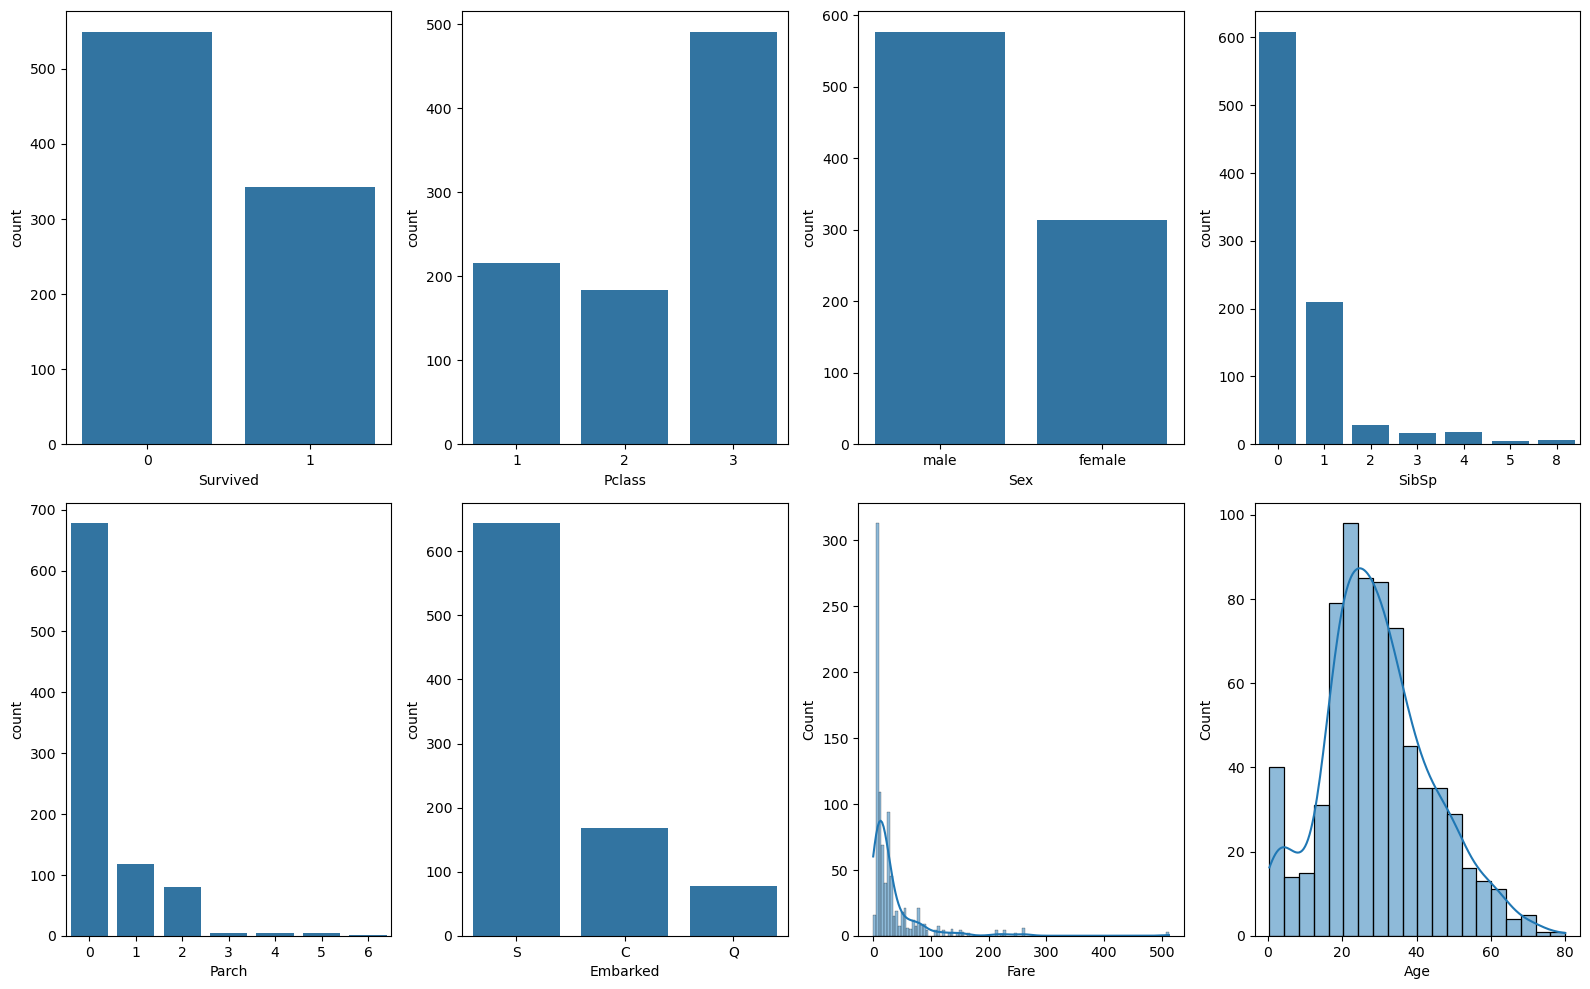

In [19]:
fig, axes = plt.subplots(2, 4, figsize=(16, 10))

sns.countplot(x='Survived', data=train, ax=axes[0,0])
sns.countplot(x='Pclass', data=train, ax=axes[0,1])
sns.countplot(x='Sex', data=train, ax=axes[0,2])
sns.countplot(x='SibSp', data=train, ax=axes[0,3])
sns.countplot(x='Parch', data=train, ax=axes[1,0])
sns.countplot(x='Embarked', data=train, ax=axes[1,1])

sns.histplot(train['Fare'], kde=True, ax=axes[1,2])         
sns.histplot(train['Age'].dropna(), kde=True, ax=axes[1,3])  

plt.tight_layout()
plt.show()


Bivariate EDA

   

<Axes: xlabel='Survived', ylabel='Fare'>

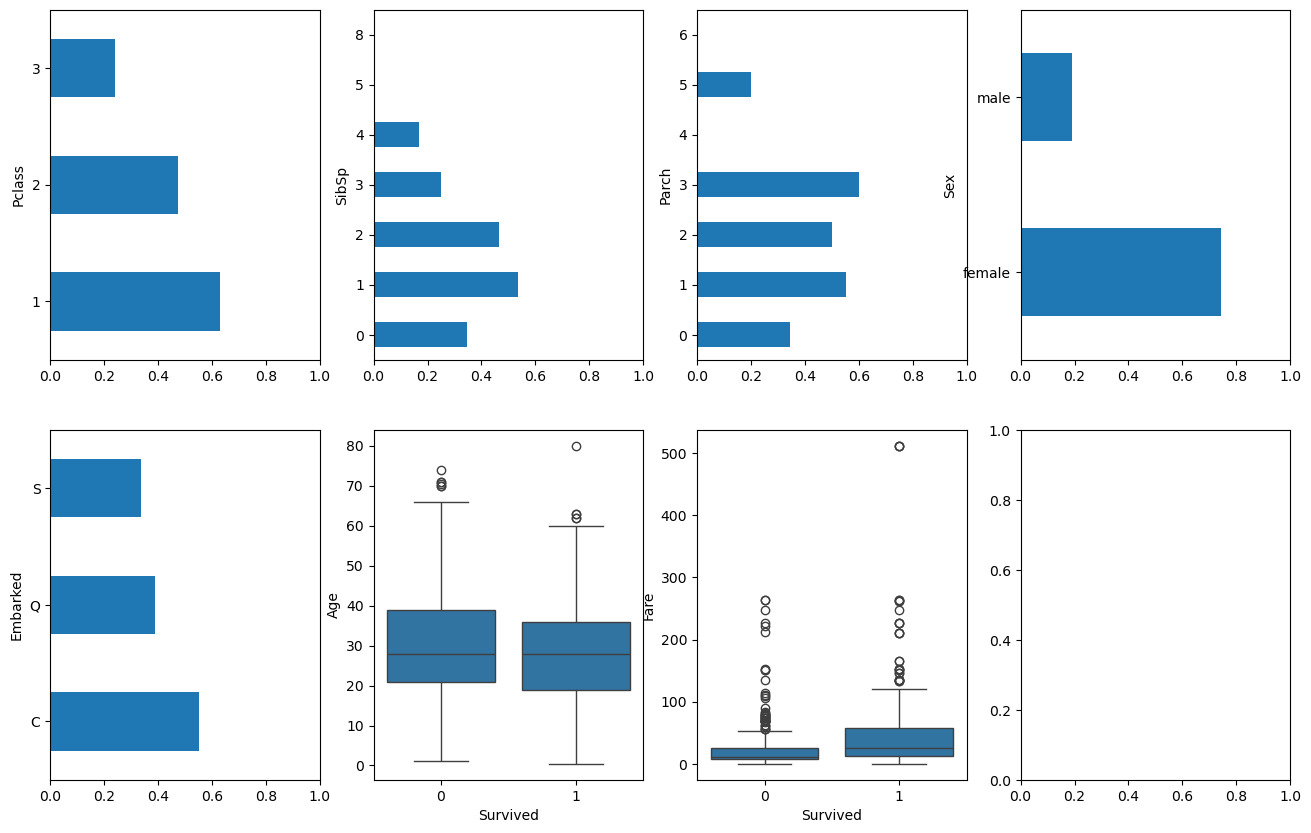

In [21]:
figbi, axesbi = plt.subplots(2, 4, figsize=(16, 10))
train.groupby('Pclass')['Survived'].mean().plot(kind='barh',ax=axesbi[0,0],xlim=[0,1])
train.groupby('SibSp')['Survived'].mean().plot(kind='barh',ax=axesbi[0,1],xlim=[0,1])
train.groupby('Parch')['Survived'].mean().plot(kind='barh',ax=axesbi[0,2],xlim=[0,1])
train.groupby('Sex')['Survived'].mean().plot(kind='barh',ax=axesbi[0,3],xlim=[0,1])
train.groupby('Embarked')['Survived'].mean().plot(kind='barh',ax=axesbi[1,0],xlim=[0,1])
sns.boxplot(x="Survived", y="Age", data=train,ax=axesbi[1,1])
sns.boxplot(x="Survived", y="Fare", data=train,ax=axesbi[1,2])

Joint Plots(continous vs continous)

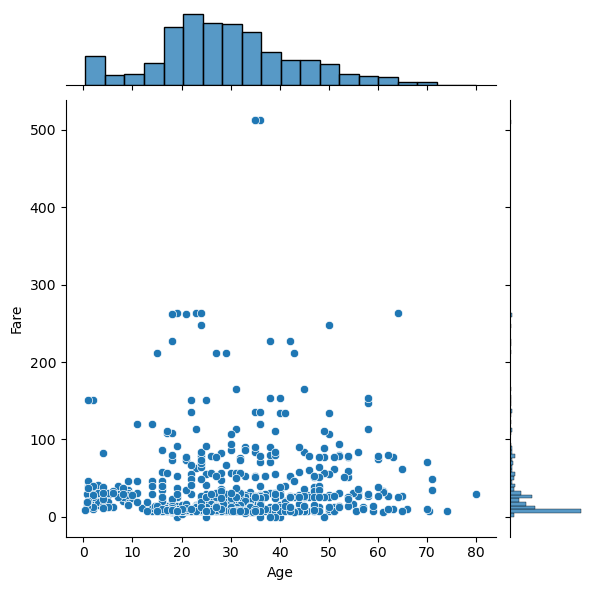

In [23]:
sns.jointplot(x="Age", y="Fare", data=train);


Multivariate EDA
Construct a Coorelation matrix of the int64 and float64 feature types

    There is a positve coorelation between Fare and Survived and a negative coorelation between Pclass and Surived

    There is a negative coorelation between Fare and Pclass, Age and Plcass



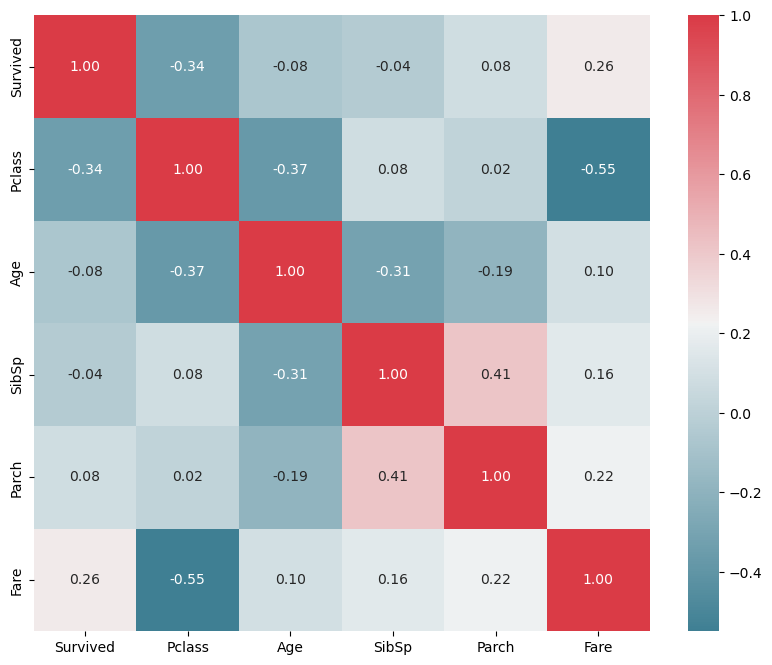

In [25]:
import seaborn as sns

# Select only numeric columns
numeric_data = train.select_dtypes(include=[np.number])

# Create figure
f, ax = plt.subplots(figsize=(10, 8))

# Compute correlation
corr = numeric_data.corr()

# Plot heatmap
sns.heatmap(
    corr,
    mask=np.zeros_like(corr, dtype=bool),
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    square=True,
    annot=True, fmt=".2f",    # optional, to show numbers inside heatmap
    ax=ax
)

plt.show()

 Feature Engineering Data- Extract title from name, Extract new features from the other features

In [27]:
train['Name_len']=train.Name.str.len()

In [28]:
train['Ticket_First']=train.Ticket.str[0]

In [29]:
train['FamilyCount']=train.SibSp+train.Parch

In [30]:
train['Cabin_First']=train.Cabin.str[0]

In [31]:
# Regular expression to get the title of the Name
train['title'] = train.Name.str.extract(r'\, ([A-Z][^ ]*\.)', expand=False)


In [32]:
train.title.value_counts().reset_index()

,title,count
0,Mr.,517
1,Miss.,182
2,Mrs.,125
3,Master.,40
4,Dr.,7
5,Rev.,6
6,Major.,2
7,Mlle.,2
8,Col.,2
9,Don.,1


Preprocessing and Prepare data for statistical modeling

a. Imput Missing or Zero values to the Fare variable


In [34]:
# we see that there are 15 Zero values and its reasonbale 
# to flag them as missing values since every ticket 
# should have a value greater than 0
print((train.Fare == 0).sum())

15


In [35]:
# mark zero values as missing or NaN
train.Fare = train.Fare.replace(0, np.NaN)

In [36]:
# keep the index
train[train.Fare.isnull()].index

Index([180, 264, 272, 278, 303, 414, 467, 482, 598, 634, 675, 733, 807, 816,
       823],
      dtype='int64', name='PassengerId')

In [37]:
train.Fare.mean()

32.75564988584475


Having missing values in a dataset can cause errors with some machine learning algorithms and either the rows that has missing values should be removed or imputed ¶

Imputing refers to using a model to replace missing values.

There are many options we could consider when replacing a missing value, for example:

        constant value that has meaning within the domain, such as 0, distinct from all other values.
        value from another randomly selected record.
        mean, median or mode value for the column.
        value estimated by another predictive model.



In [39]:
# impute the missing Fare values with the mean Fare value
train['Fare'] = train['Fare'].fillna(train['Fare'].mean())

In [40]:
# validate if any null values are present after the imputation
train[train.Fare.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_len,Ticket_First,FamilyCount,Cabin_First,title
PassengerId,,,,,,,,,,,,,,,,


b. Imput Missing or Zero values to the Age variable 

In [42]:
# we see that there are 0 Zero values
print((train.Age == 0).sum())

0


In [43]:
# impute the missing Age values with the mean Fare value
train['Age'] = train['Age'].fillna(train['Fare'].mean())

In [44]:
# validate if any null values are present after the imputation
train[train.Age.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_len,Ticket_First,FamilyCount,Cabin_First,title
PassengerId,,,,,,,,,,,,,,,,


c. Imput Missing or Zero values to the Cabin variable 

In [46]:
# We see that a majority 77% of the Cabin variable has missing values.
# Hence will drop the column from training a machine learnign algorithem
train.Cabin.isnull().mean()

0.7710437710437711

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Name          891 non-null    object 
 3   Sex           891 non-null    object 
 4   Age           891 non-null    float64
 5   SibSp         891 non-null    int64  
 6   Parch         891 non-null    int64  
 7   Ticket        891 non-null    object 
 8   Fare          891 non-null    float64
 9   Cabin         204 non-null    object 
 10  Embarked      889 non-null    object 
 11  Name_len      891 non-null    int64  
 12  Ticket_First  891 non-null    object 
 13  FamilyCount   891 non-null    int64  
 14  Cabin_First   204 non-null    object 
 15  title         890 non-null    object 
dtypes: float64(2), int64(6), object(8)
memory usage: 118.3+ KB





Statistical Modelling

In [49]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Name_len', 'Ticket_First', 'FamilyCount',
       'Cabin_First', 'title'],
      dtype='object')

In [50]:
trainML = train[['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked', 'Name_len', 'Ticket_First', 'FamilyCount',
       'title']]

In [51]:
# drop rows of missing values
trainML = trainML.dropna()
trainML

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_len,Ticket_First,FamilyCount,title
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S,23,A,1,Mr.
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C,51,P,1,Mrs.
3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S,22,S,0,Miss.
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S,44,1,1,Mrs.
5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S,24,3,0,Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,S,21,2,0,Rev.
888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,S,28,1,0,Miss.
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,32.75565,1,2,W./C. 6607,23.4500,S,40,W,3,Miss.


In [52]:
# check the datafram has any missing values
trainML.isnull().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
Name_len        0
Ticket_First    0
FamilyCount     0
title           0
dtype: int64